In [197]:
# Library Imports
import scipy.sparse
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.model_selection import cross_val_score

## Importing Data

In [43]:
#NPZ Data
train_vec = scipy.sparse.load_npz('review_text_train_vec.npz')
test_vec = scipy.sparse.load_npz('review_text_test_vec.npz')
df = pd.read_csv(r"review_meta_train.csv", index_col = False, delimiter = ',', header=None)
df1 = pd.read_csv(r"review_meta_test.csv", index_col = False, delimiter = ',', header=None)

Y_train = df[7][1:]
X_train = train_vec.todense()

Y_test = df1[6][1:]
X_test = test_vec.todense()

In [59]:
#DOC2VEC Data
doc50_train = pd.read_csv(r"review_text_train_doc2vec50.csv", index_col = False, delimiter = ',', header=None)
doc100_train = pd.read_csv(r"review_text_train_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
doc200_train = pd.read_csv(r"review_text_train_doc2vec200.csv", index_col = False, delimiter = ',', header=None)

doc50_test = pd.read_csv(r"review_text_test_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
doc100_test = pd.read_csv(r"review_text_test_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
doc200_test = pd.read_csv(r"review_text_test_doc2vec100.csv", index_col = False, delimiter = ',', header=None)

X_train50 = doc2.to_numpy()
X_train100 = doc2.to_numpy()
X_train200 = doc2.to_numpy()
X_test50 = doc21.to_numpy()
X_test100 = doc21.to_numpy()
X_test200 = doc21.to_numpy()

In [57]:
from sklearn.preprocessing import normalize
X_normalized = normalize(X_train)

## Exporting Data

In [199]:
# Function to export data
def exportToCsv(filename, results):
    df = pd.DataFrame()
    df['rating'] = results
    df.index = np.arange(1, len(df) + 1)
    df.index.name = "Instance_id"
    df.to_csv(filename)

## Multinomial NB

In [193]:
# Multinomial NB
from sklearn.naive_bayes import MultinomialNB

multinomial_nb = MultinomialNB()
m_nb_pred = multinomial_nb.fit(X_train, Y_train).predict(X_test)

In [203]:
exportToCsv('multinomial_results.csv', m_nb_pred)

In [5]:
# Cross-validation for Multinomial NB
from sklearn.model_selection import cross_val_score
score = cross_val_score(multinomial_nb, X_train, Y_train, cv=5).mean()

array([0.83291771, 0.84164589, 0.84235839, 0.83627294, 0.83413504])

In [36]:
multinomial_nb1 = MultinomialNB(fit_prior=False)
cross_val_score(multinomial_nb1, X_train, Y_train, cv=5).mean()

0.8333689458621649

In [25]:
# Cross Validation for different types of NB
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB

g_nb = GaussianNB()
m_nb = MultinomialNB()
c_nb = ComplementNB()

In [27]:
# Accuracy
nbscores = []
nbscores.append(cross_val_score(g_nb, X_train, Y_train, cv=5).mean())
nbscores.append(cross_val_score(m_nb, X_train, Y_train, cv=5).mean())
nbscores.append(cross_val_score(c_nb, X_train, Y_train, cv=5).mean())

In [163]:
# Variance
nbvar = []
nbvar.append(cross_val_score(g_nb, X_train, Y_train, cv=5).std()**2)
nbvar.append(cross_val_score(m_nb, X_train, Y_train, cv=5).std()**2)
nbvar.append(cross_val_score(c_nb, X_train, Y_train, cv=5).std()**2)

In [118]:
# Accuracy (docvec)
nbscores_docvec = []
nbscores_docvec.append(cross_val_score(g_nb, X_normalized, Y_train, cv=5).mean())
nbscores_docvec.append(cross_val_score(m_nb, X_normalized, Y_train, cv=5).mean())
nbscores_docvec.append(cross_val_score(c_nb, X_normalized, Y_train, cv=5).mean())

In [166]:
nbvar

[3.045501246172802e-05, 1.4922513333135562e-05, 4.605434824286763e-06]

<Figure size 720x360 with 0 Axes>

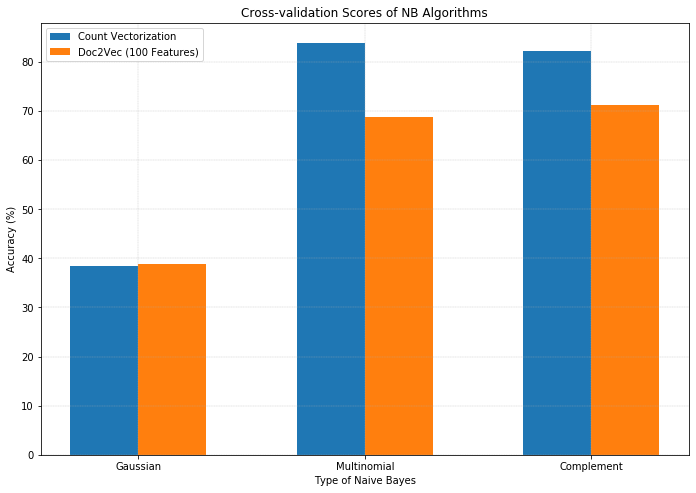

In [160]:
# Code used to plot was retrieved from Stackoverflow
# Link: https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged

# Numbers of pairs of bars you want
N = 3

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = list(map(lambda x:x*100,nbscores))
# Specify the values of orange bars (height)
orange_bar = list(map(lambda x:x*100,nbscores_docvec))

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))
plt.figure().add_axes([0,0,1.5,1.5])

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Count Vectorization')
plt.bar(ind + width, orange_bar, width, label='Doc2Vec (100 Features)')

plt.xlabel('Type of Naive Bayes')
plt.ylabel('Accuracy (%)')
plt.title('Cross-validation Scores of NB Algorithms')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Gaussian', 'Multinomial', 'Complement'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.grid(linestyle='--',linewidth=0.32)
plt.show()

## Decision Tree

In [9]:
# Decision Tree Classifier
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train100, Y_train)

In [10]:
scores = cross_val_score(dt, X_train100, Y_train, cv=5)

In [183]:
# Gridsearch
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':('gini', 'entropy'),
              'splitter':('best', 'random'),
              'min_samples_split':[2,3,4],
              'min_samples_leaf':[1,2,3]
             }
dtgrid = GridSearchCV(dt, parameters,return_train_score=True)
dtgrid.fit(X_train100, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                

In [190]:
print(dtgrid.best_params_)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}


In [63]:
dtscores = []
dtscores.append(cross_val_score(final_dt, X_train50, Y_train, cv=5).mean())
dtscores.append(cross_val_score(final_dt, X_train100, Y_train, cv=5).mean())
dtscores.append(cross_val_score(final_dt, X_train200, Y_train, cv=5).mean())

In [ ]:
dtvar = []
dtvar.append(sqrt(cross_val_score(final_dt, X_train50, Y_train, cv=5).std()))
dtvar.append(sqrt(cross_val_score(final_dt, X_train100, Y_train, cv=5).std()))
dtvar.append(sqrt(cross_val_score(final_dt, X_train200, Y_train, cv=5).std()))

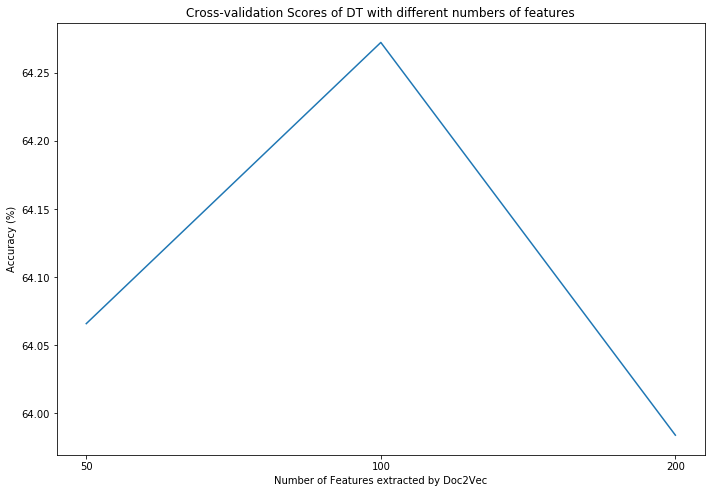

In [188]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
encoding = [50, 100, 200]
N = len(encoding)
x2 = np.arange(N)
plt.plot(x2, list(map(lambda x:x*100,dtscores)))
plt.xticks(x2, encoding)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

plt.xlabel('Number of Features extracted by Doc2Vec')
plt.ylabel('Accuracy (%)')
plt.title('Cross-validation Scores of DT with different numbers of features')

plt.show()

In [195]:
# Final Decision Tree Model
final_dt = tree.DecisionTreeClassifier(criterion='entropy',
                                 min_samples_leaf=1,
                                 min_samples_split=2,
                                 splitter='best')
dt = dt.fit(X_train100, Y_train).predict(X_test100)

In [204]:
exportToCsv('DT_results.csv', dt)

## Ensemble (Not Used in Report)

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
estimators = [
     ('svmM',svm.SVC(kernel='rbf', random_state=0,gamma='scale',C=3)),
     ('knn',KNeighborsClassifier(n_neighbors=5,algorithm='kd_tree'))
    ]
stacked_clf = StackingClassifier(estimators=estimators, final_estimator=MLPClassifier(solver='lbfgs', alpha=1e-5,
                          hidden_layer_sizes=(5, 2),
                          random_state=1,max_iter=100000))

In [ ]:
stacked_clf = stacked_clf.fit(X_train100, Y_train)

In [ ]:
stacked_pred = stacked_clf.predict(X_test100)

In [ ]:
exportToCsv('stacked_results.csv', stacked_pred)